<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW5/problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Sachin Gupta (sg758253@sju.edu)
* Date: 03/05/22
* Assignment: 5
* Convert the entire Linear Regression Python notebook to R and redo all the data analysis steps (in R): https://github.com/bforoura/IDS/blob/main/linear_regression_Python.ipynb (Links to an external site.).


# Supervised Learning: Linear Regression using R

In [1]:
# instaling required lib
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [2]:
# importing lib
library(caret)
library(ggplot2)
library(repr)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [3]:
# import dataset
# CompanyDF <- read_csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv")
CompanyDF <- read.csv("https://raw.githubusercontent.com/bforoura/AML/master/Company_data.csv")


In [4]:
# display rows
head(CompanyDF)

,TV,Radio,Newspaper,Sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,12.0
4,151.5,41.3,58.5,16.5
5,180.8,10.8,58.4,17.9
6,8.7,48.9,75.0,7.2


In [5]:
# summary of dataset
summary(CompanyDF)

       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

In [6]:
tv_radio_newspaper = CompanyDF$TV+CompanyDF$Radio+CompanyDF$Newspaper

# Examine Correlations

In [7]:
# Let’s compute the standard correlation coefficient (Pearson’s r) between pairs of attributes
# to determine which parameter has the greatest correlation with Sales

corr_matrix = cor(CompanyDF, method = "pearson")
corr_matrix


,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


# Examine Features with Boxplots

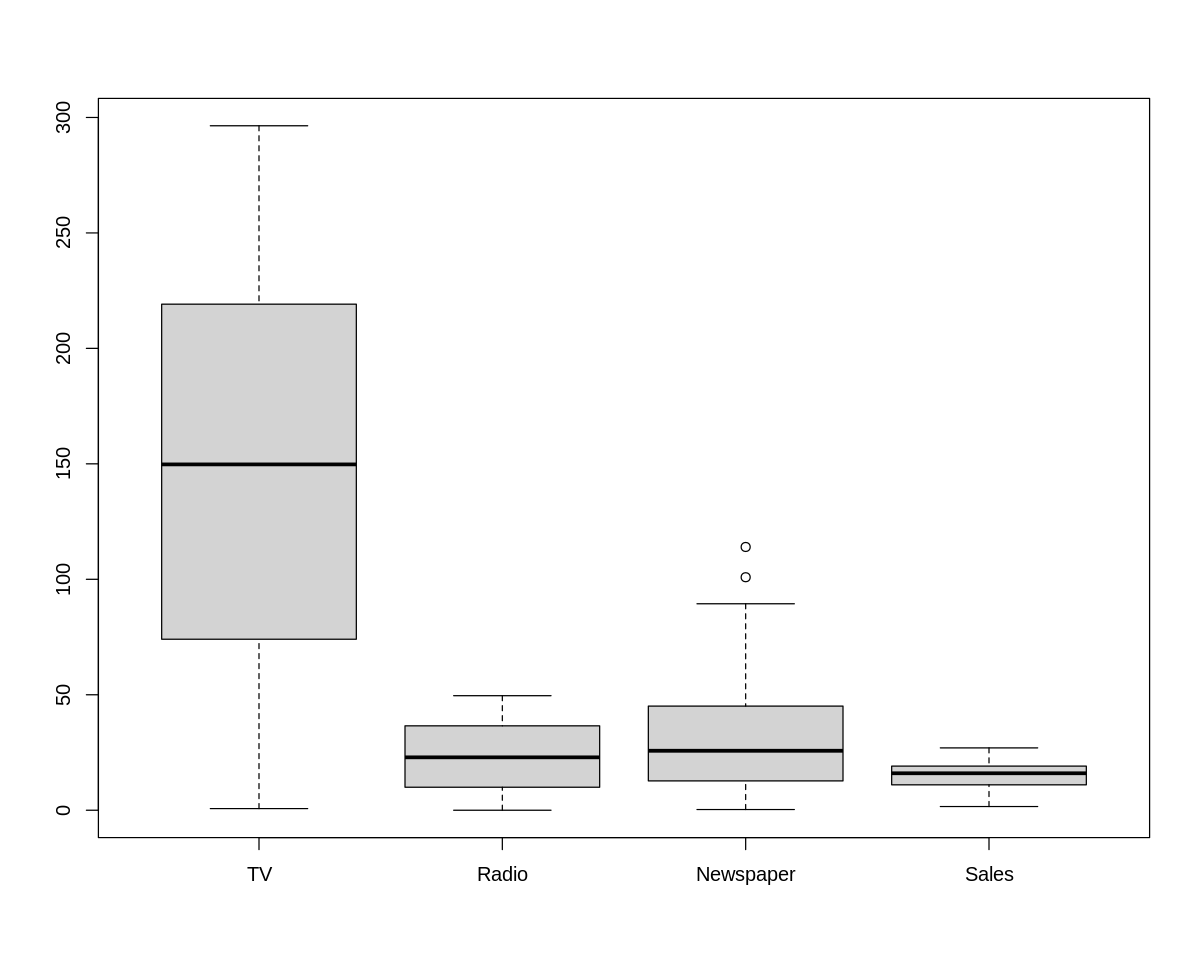

In [8]:
options(repr.plot.width=10, repr.plot.height=8)
boxplot(CompanyDF)

# Examine Feature Distributions

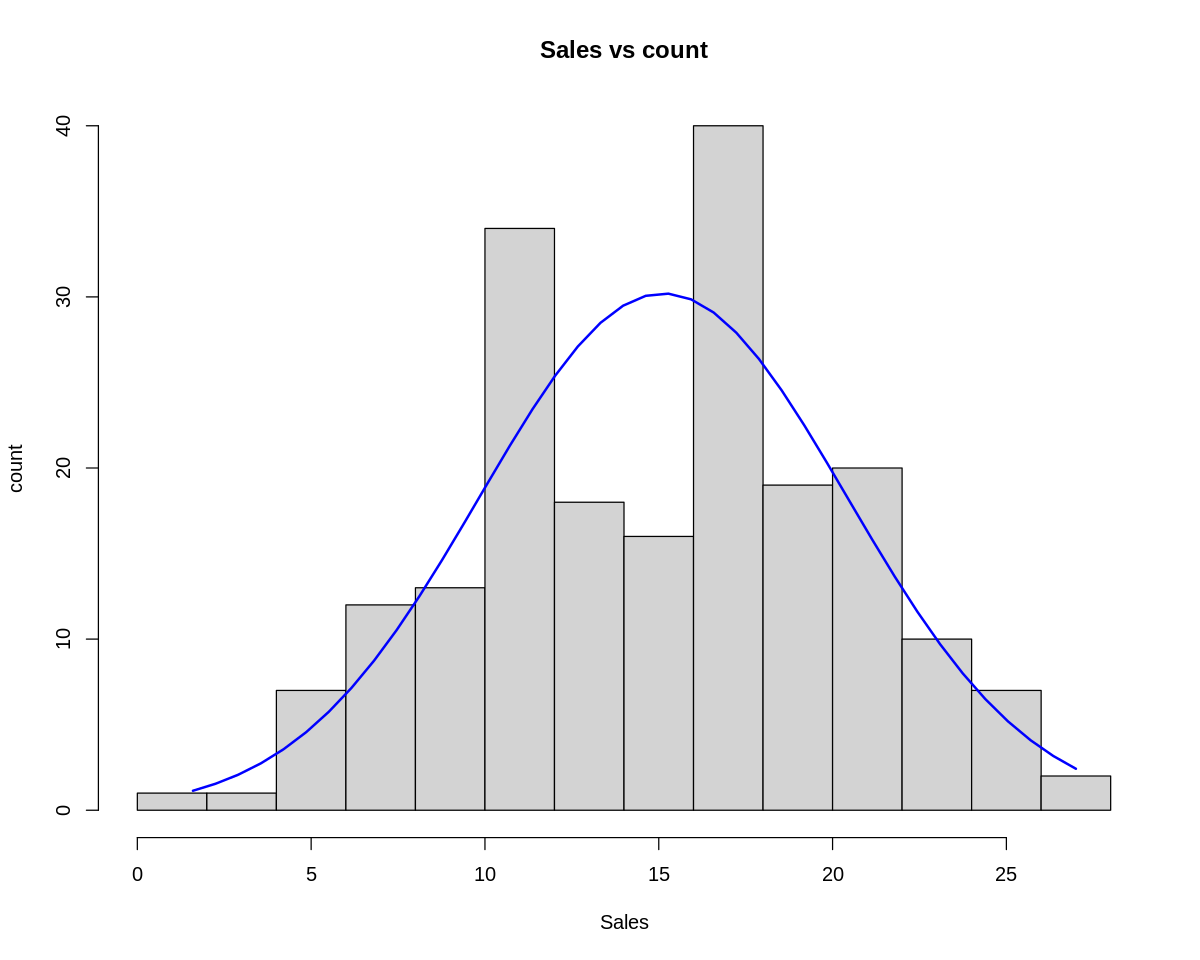

In [9]:
options(repr.plot.width=10, repr.plot.height=8)
x <- CompanyDF$Sales
h<-hist(x,breaks=10,main="Sales vs count",xlab="Sales",ylab='count')
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

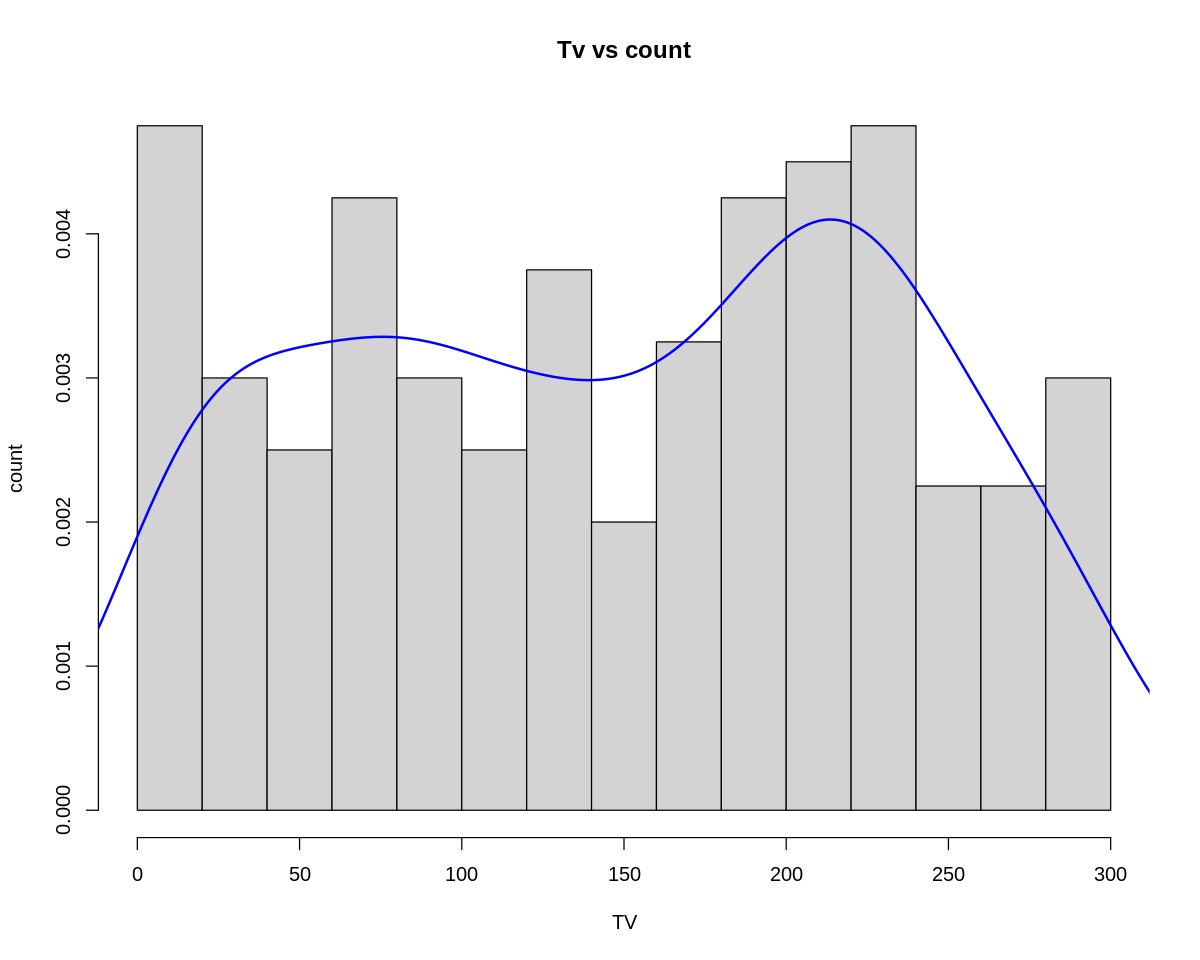

In [10]:
options(repr.plot.width=10, repr.plot.height=8)
x <- CompanyDF$TV
hist(x,breaks=15, prob = TRUE, xlab = "TV", ylab='count',main = "Tv vs count")
lines(density(x),lwd = 2, col = "blue")

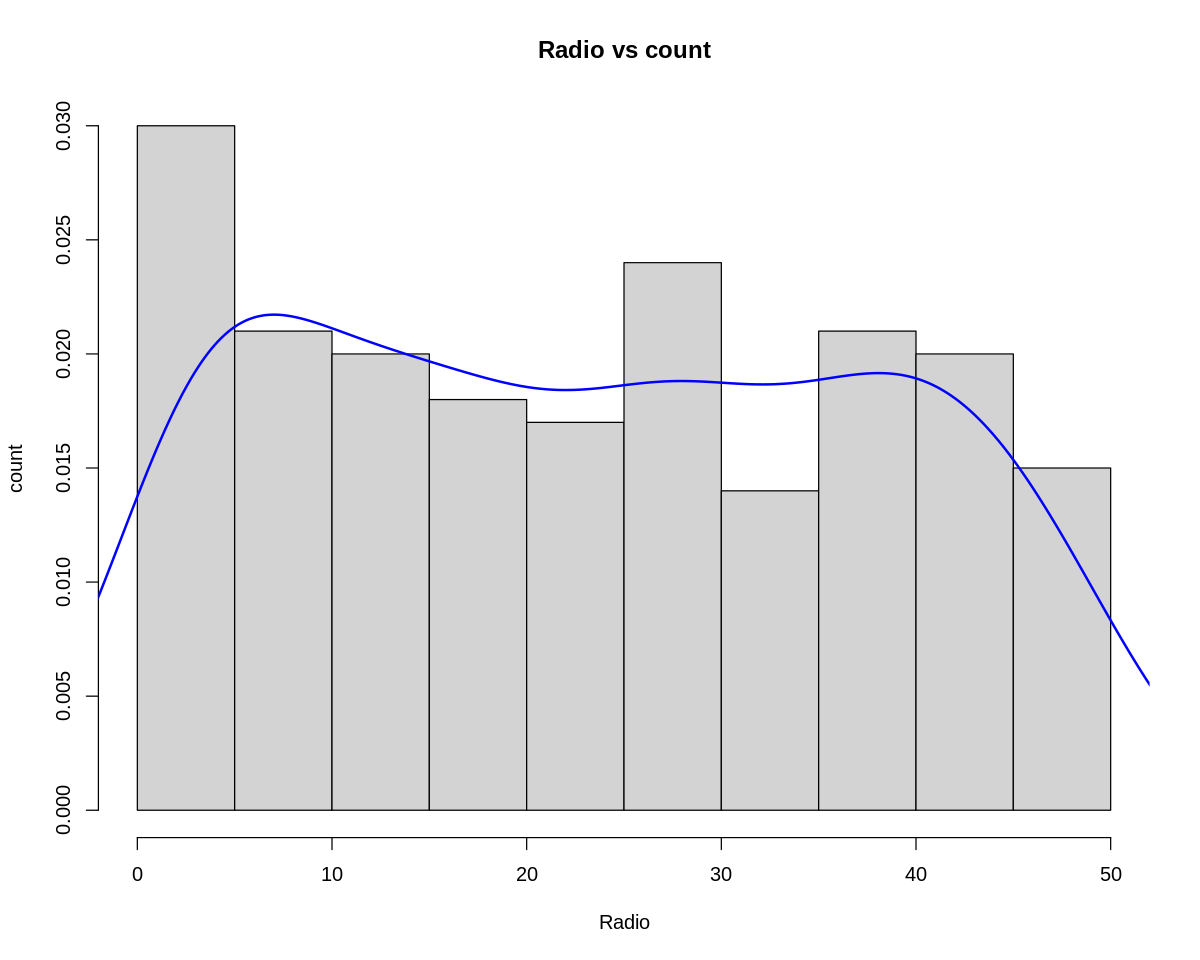

In [11]:
options(repr.plot.width=10, repr.plot.height=8)
x <- CompanyDF$Radio
hist(x,breaks=15, prob = TRUE, xlab = "Radio", ylab='count',main = "Radio vs count")
lines(density(x),lwd = 2, col = "blue")

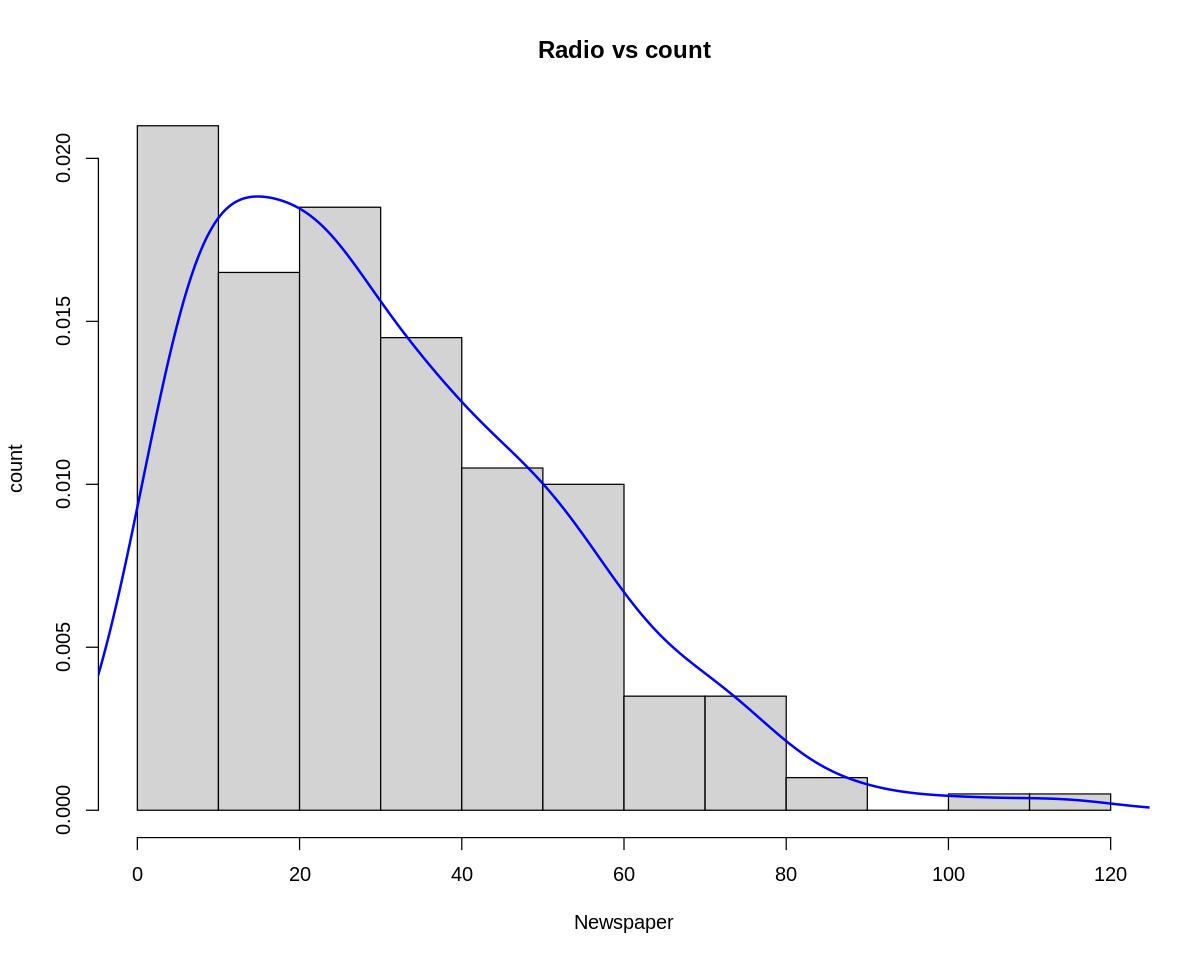

In [12]:
options(repr.plot.width=10, repr.plot.height=8)
x <- CompanyDF$Newspaper
hist(x,breaks=15, prob = TRUE, xlab = "Newspaper", ylab='count',main = "Radio vs count")
lines(density(x),lwd = 2, col = "blue")

# Check for Missing Values

In [13]:
sum(is.na(CompanyDF))

[1] 0

## **Bulid the Linear Regression Model**

* y = f(x), where

> y (dependent parameter) = Sales

> x (independent parameter) = TV, Radio, or NewsPaper

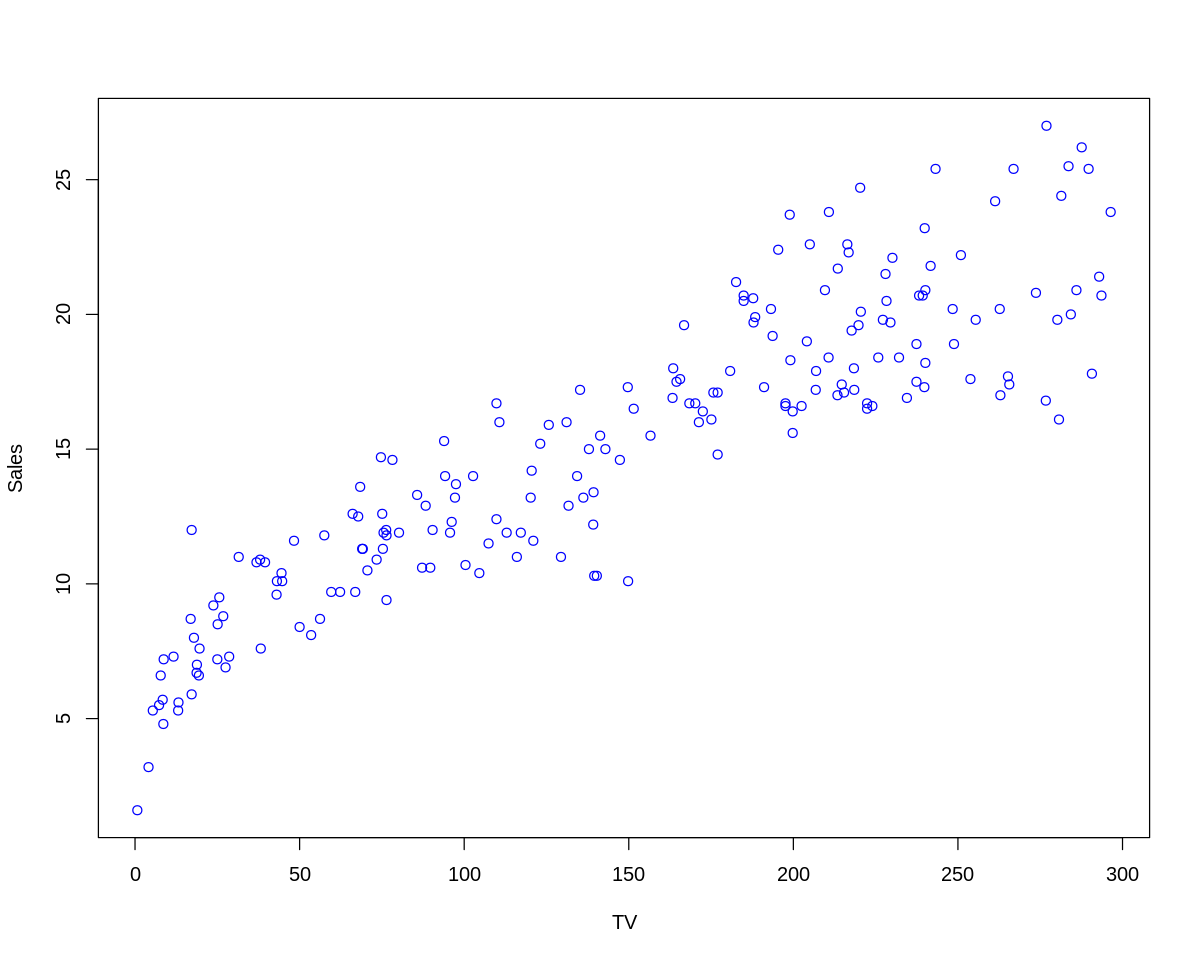

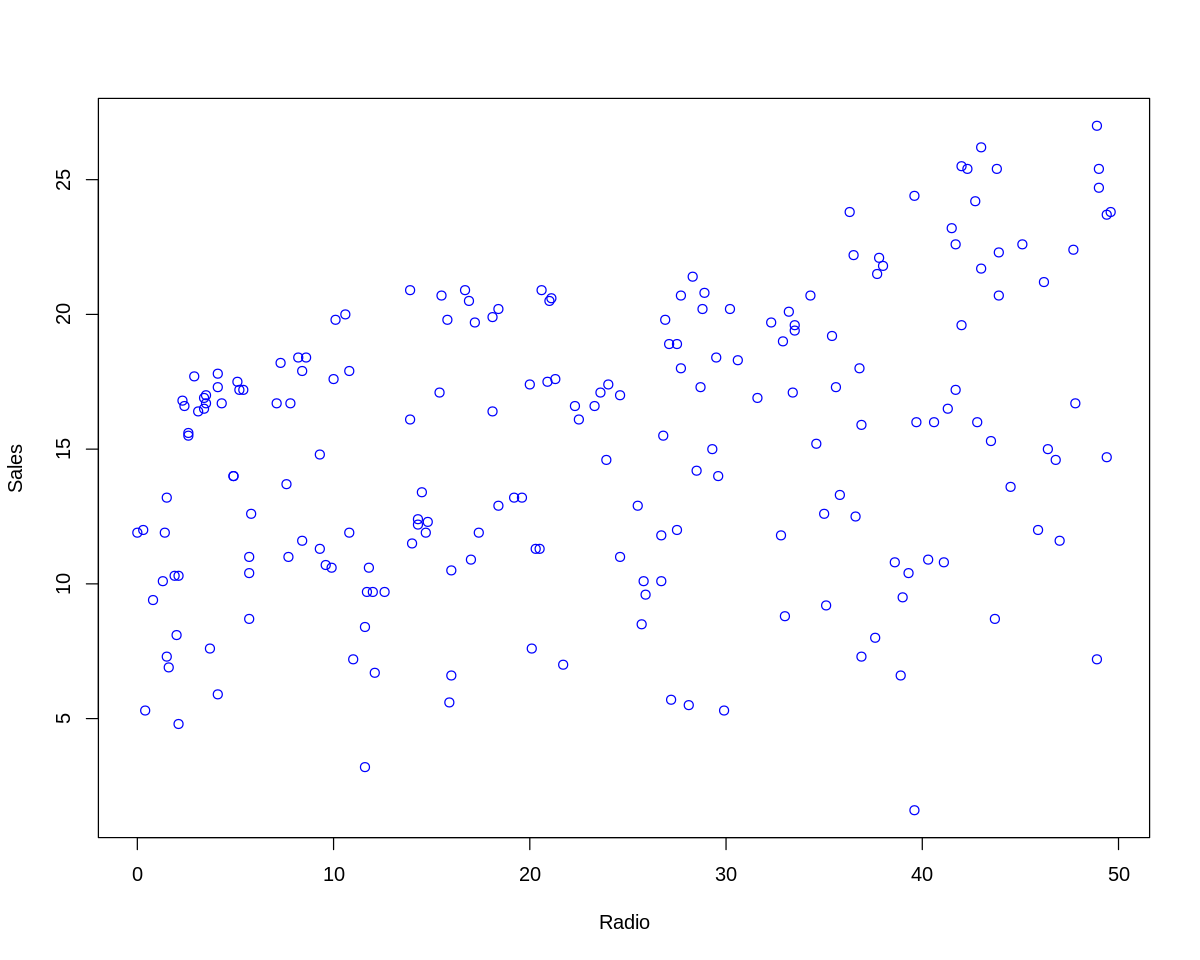

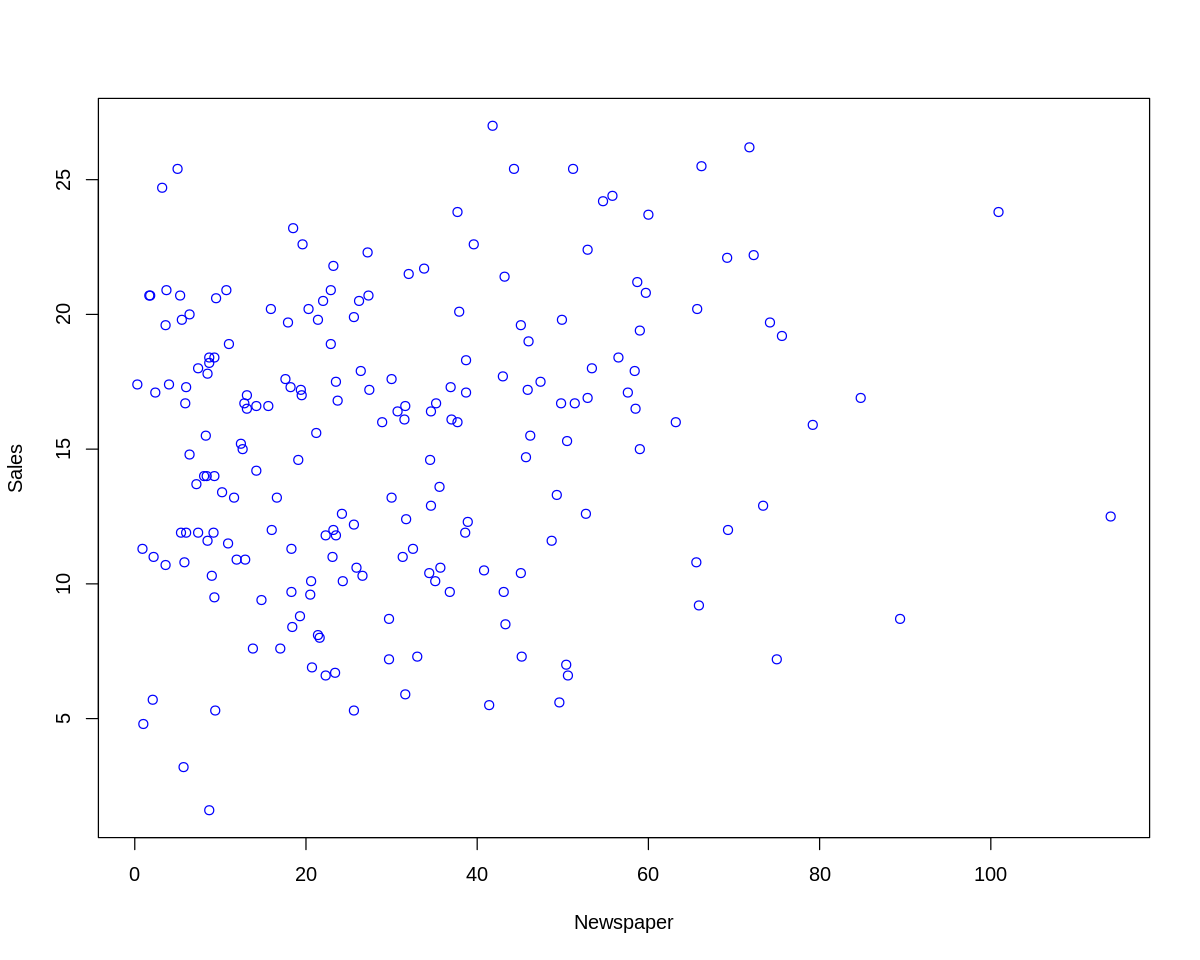

In [14]:
options(repr.plot.width=10, repr.plot.height=8)

plot(x= CompanyDF$TV, y= CompanyDF$Sales, col = "blue",xlab='TV',ylab='Sales')

plot(x= CompanyDF$Radio, y= CompanyDF$Sales, col = "blue",xlab='Radio',ylab='Sales')

plot(x= CompanyDF$Newspaper, y= CompanyDF$Sales, col = "blue",xlab='Newspaper',ylab='Sales')


# **Use the Entire Data Set for Training**

# 1. Sales vs TV

In [15]:
# To find intercept and slope 

x=CompanyDF$Sales
y=CompanyDF$TV
lm1 <- lm(x ~ y, data = CompanyDF,)
lm1


Call:
lm(formula = x ~ y, data = CompanyDF)

Coefficients:
(Intercept)            y  
    6.97482      0.05546  


Linear Model: Sales = 6.97 + 0.05 * TV

In [16]:
#  R2 score and MSE 
cat('R2 sqaured: ',summary(lm1)$r.squared)
cat('\n')
cat('MSE: ',mean(lm1$residuals^2))

R2 sqaured:  0.8121757
MSE:  5.217744

# 2. Sales Vs All

In [17]:
x=CompanyDF$Sales
y=CompanyDF$TV+CompanyDF$Radio+CompanyDF$Newspaper
lm_sales_all1 <- lm(x ~ y, data = CompanyDF,)
lm_sales_all1


Call:
lm(formula = x ~ y, data = CompanyDF)

Coefficients:
(Intercept)            y  
    4.57357      0.05256  


In [18]:
#  R2 score and MSE 
cat('R2 sqaured: ',summary(lm_sales_all1)$r.squared)
cat('\n')
cat('MSE: ',mean(lm_sales_all1$residuals^2))

R2 sqaured:  0.8554715
MSE:  4.014991

#**Split the Data into Training and Test Cases (70-30 ratio)**

In [19]:
set.seed(130)
dt <- createDataPartition(y=CompanyDF$Sales, p = 0.7,list = FALSE,)
train<-CompanyDF[dt,]
test<-CompanyDF[-dt,]
dim(train)
dim(test)

[1] 141   4

[1] 59  4

# 3. Linear Model For Sales vs TV

In [20]:
trainY=train$Sales
trainX =train$TV

#lm2 <- lm(Sales ~ TV, data = train,)   # also valid
lm2 <- lm(trainY ~ trainX)
lm2


Call:
lm(formula = trainY ~ trainX)

Coefficients:
(Intercept)       trainX  
      6.706        0.058  


Linear Model: Sales = 6.70 + 0.058 * TV

In [21]:
#  R2 score and MSE 
cat('R2 sqaured: ',summary(lm2)$r.squared)
cat('\n')
cat('MSE: ',mean(lm2$residuals^2))

R2 sqaured:  0.8078914
MSE:  5.784546

# 4. Linear Model For Sales vs. (TV, Radio, Newspaper)

In [22]:
trainY=train$Sales
trainX =train$TV+train$Radio+train$Newspaper

lm3 <- lm(trainY ~ trainX)
lm3


Call:
lm(formula = trainY ~ trainX)

Coefficients:
(Intercept)       trainX  
    4.16579      0.05506  


Linear Model: Sales = 4.16 + 0.055 * TV

In [23]:
#  R2 score and MSE 
cat('R2 sqaured: ',summary(lm3)$r.squared)
cat('\n')
cat('MSE: ',mean(lm3$residuals^2))

R2 sqaured:  0.8618543
MSE:  4.15968

## **Summary**

* Model trained and tested on the entire data set of 200 cases (Sales vs TV): 
> **Sales = 6.97 + 0.05 * TV**    


* Model trained on 70% of the data and tested on 30% of the data (Sales vs TV): 
> **Sales = 6.70 + 0.058 * TV**

* Model trained and tested on the entire data set of 200 cases (Sales vs TV,Radio and NewPaper): 
> **Sales = 4.57 + 0.05 * TV**    

* Model trained on 70% of the data and tested on 30% of the data (Sales vs TV,Radio and NewPaper): 
> **Sales = 4.16 + 0.055 * TV**


No major differenece in accuracy of model trained with complete data and with the ratio of 70-30. in this project we imported dataset and we found that there is no missing values in the dataset. We created 4 model, 2 of them with complete datset and remains 2 with 70-30 ratio. and there is no major difference in accuracy. 




# **A. Plot for Sales vs TV**

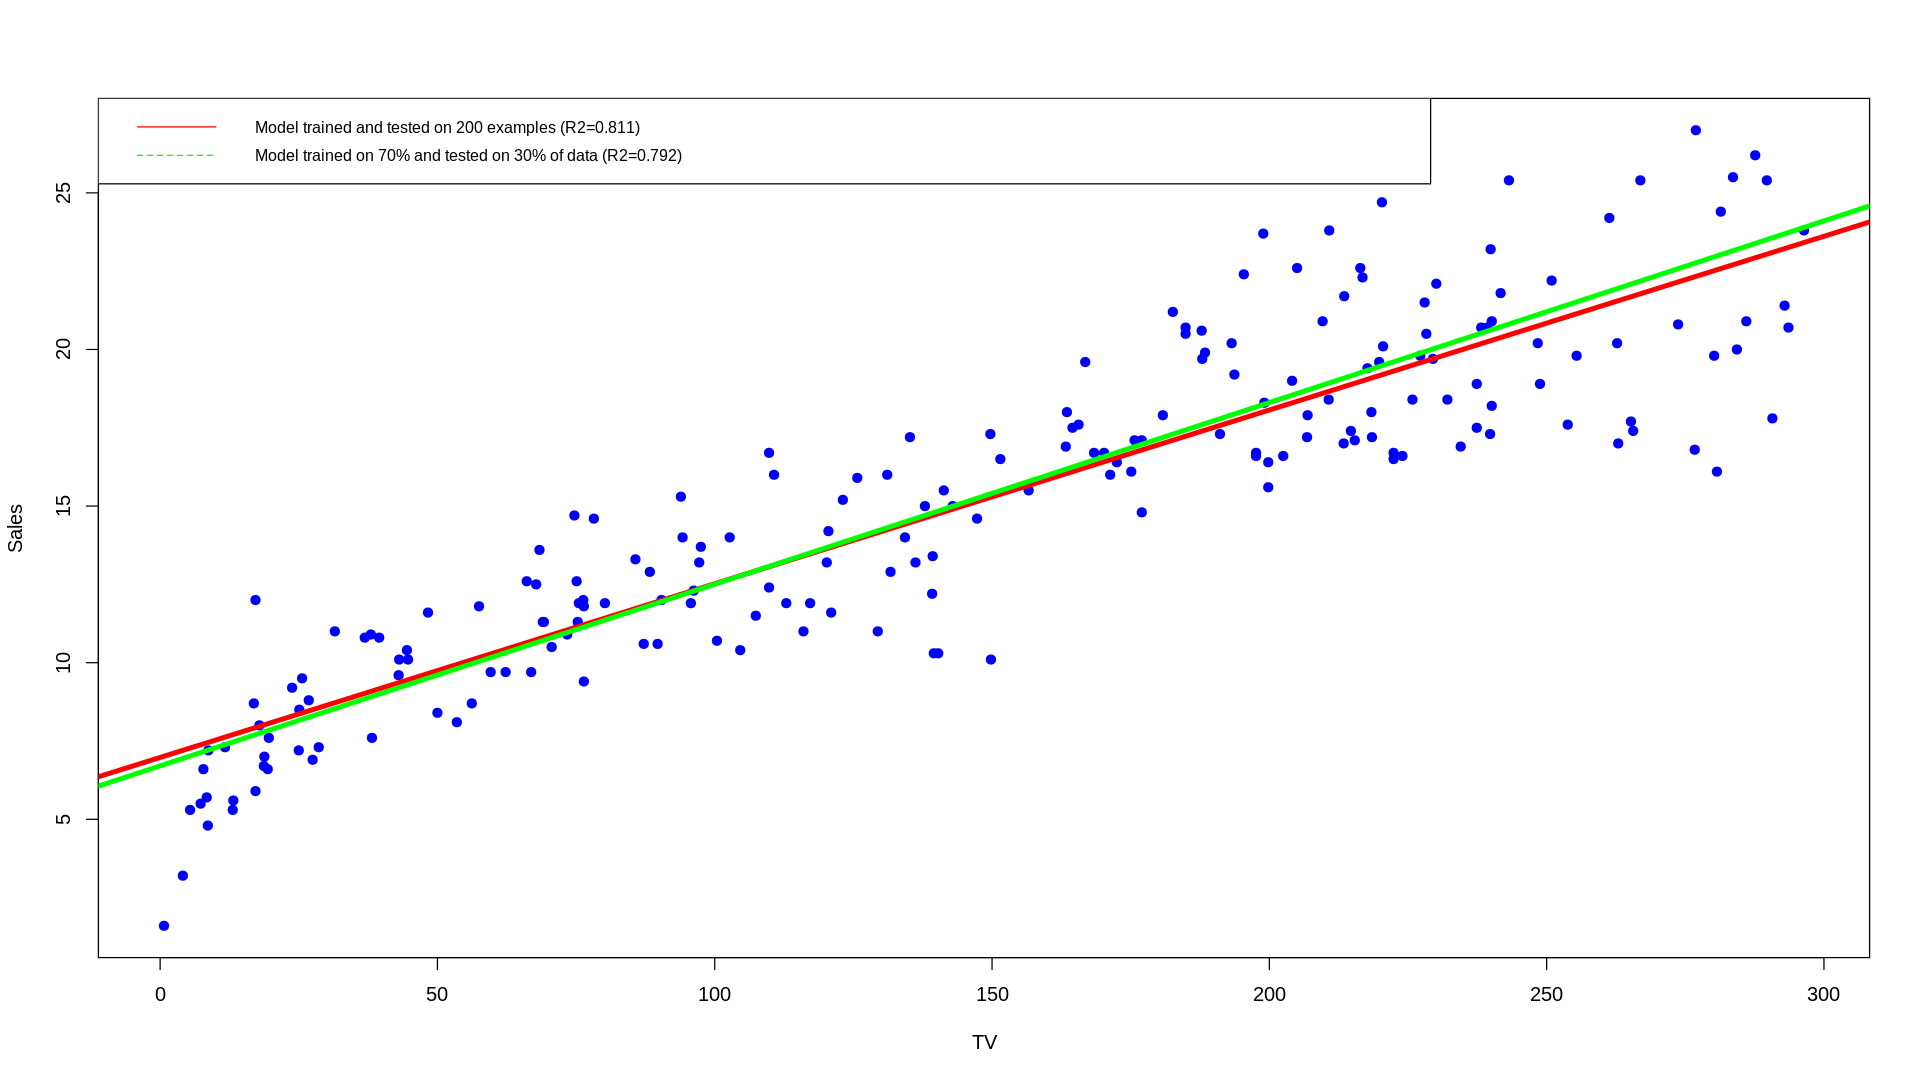

In [24]:
options(repr.plot.width=16, repr.plot.height=9)

plot(Sales ~ TV,data = CompanyDF, pch = 19,col="blue",xlab = "TV", ylab = "Sales")
abline(lm1, col="red",lw=4)
abline(lm2, col="green",lw=4)
legend("topleft", legend=c("Model trained and tested on 200 examples (R2=0.811)", "Model trained on 70% and tested on 30% of data (R2=0.792)"), col=c("red", "green"), lty=1:2, cex=0.8)

No major differenece in accuracy of model trained with complete data and with the ratio of 70-30.

# **B. Plot for Sales vs TV, Radio and newspaper**

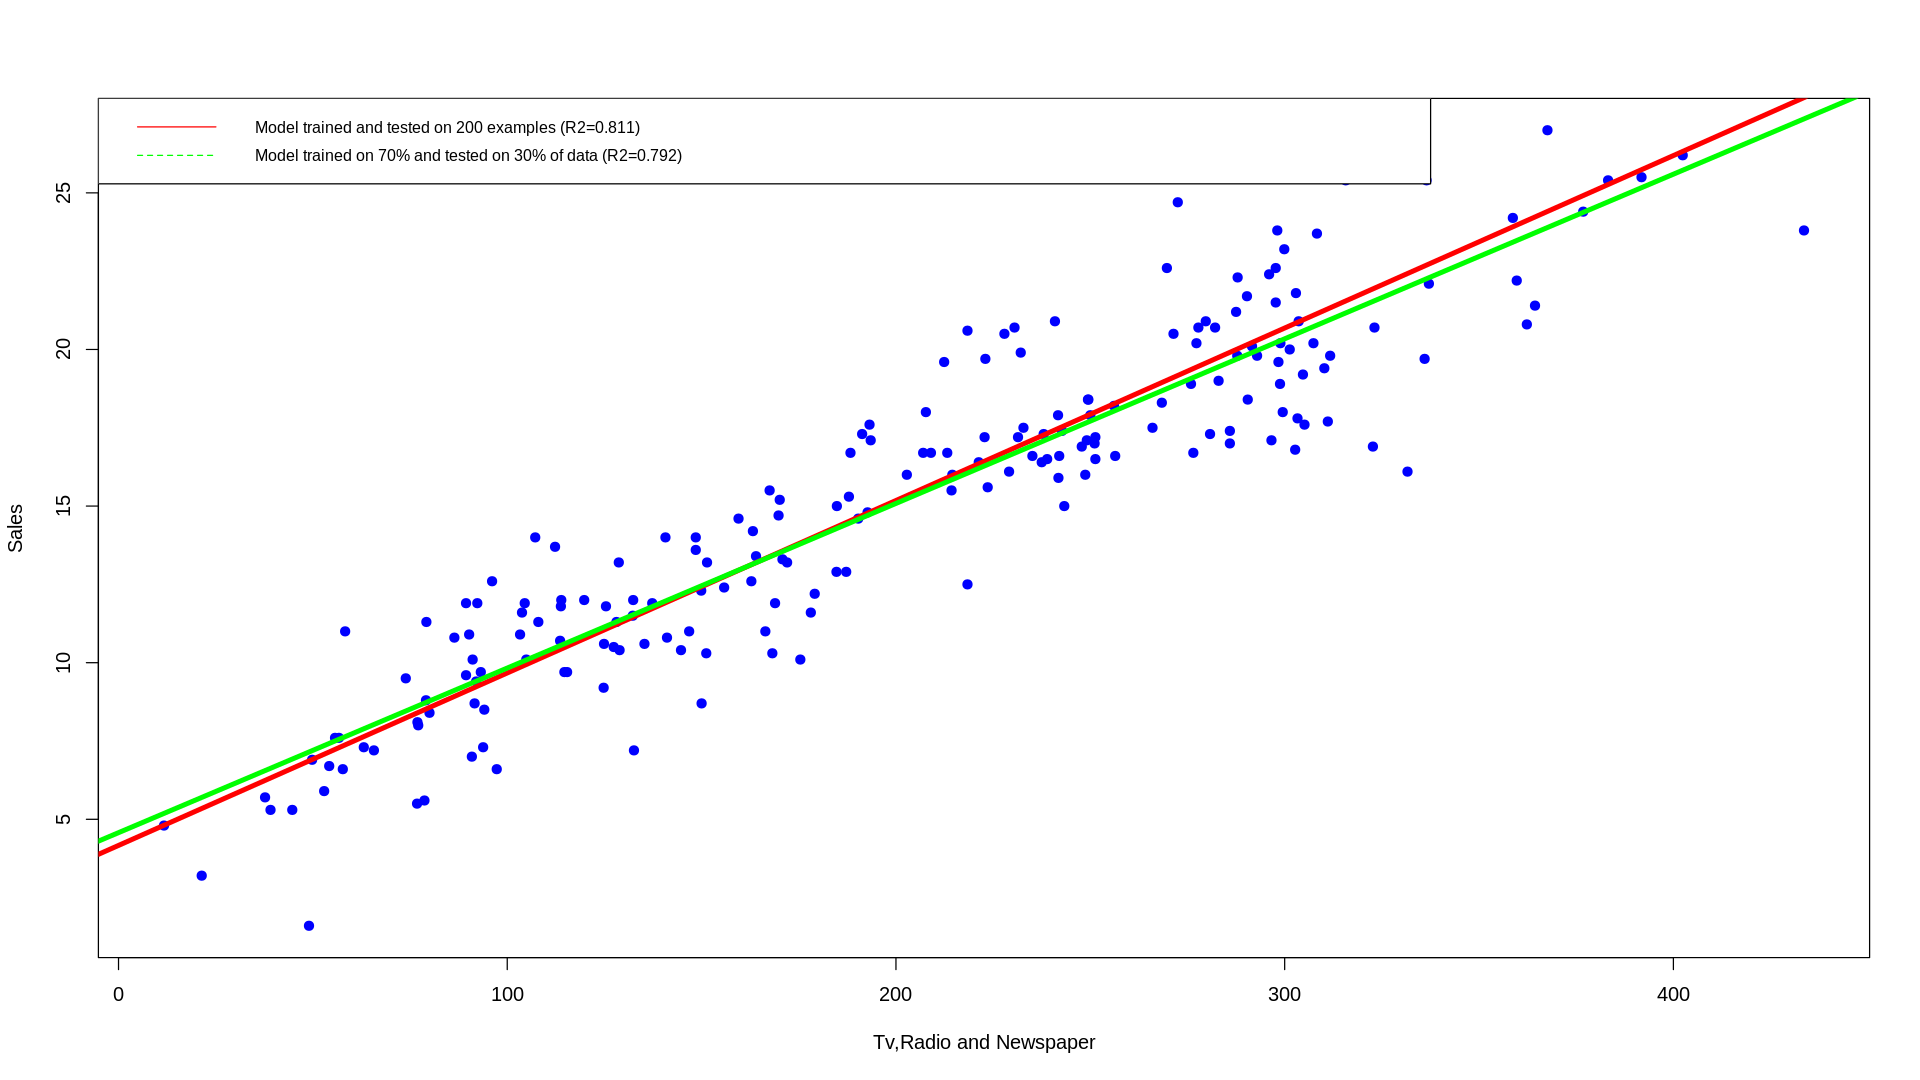

In [29]:
options(repr.plot.width=16, repr.plot.height=9)

plot(Sales ~ tv_radio_newspaper,data = CompanyDF, pch = 19,col="blue",xlab = "Tv,Radio and Newspaper", ylab = "Sales")
abline(lm3, col="red",lw=4)
abline(lm_sales_all1, col="green",lw=4)
legend("topleft", legend=c("Model trained and tested on 200 examples (R2=0.811)", "Model trained on 70% and tested on 30% of data (R2=0.792)"), col=c("red", "green"), lty=1:2, cex=0.8)